In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [2]:
import pandas as pd
import os
csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
project_dir = r'C:\\Users\\Brooz\\my_churn_app'
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
df.describe(include="all")
df = df.drop(['customerID'], axis=1)
print(df.head())
print(df.isnull().sum())
print(df.dtypes)
print(df['Churn'].value_counts(normalize=True))

   gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No  

In [4]:
df.drop(labels=df[df["tenure"]==0].index, axis=0, inplace=True)
print(df[df["tenure"]==0].index)
print(df.isnull().sum())
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})
print(df["Churn"])

Index([], dtype='int64')
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64


In [5]:
churn_analysis = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack()
print(churn_analysis)

Churn                 0         1
SeniorCitizen                    
0              0.763497  0.236503
1              0.583187  0.416813


In [6]:
print(df["InternetService"].describe(include=['object', 'bool']))

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object


In [7]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
print(df[numerical_cols].describe())

            tenure  MonthlyCharges
count  7032.000000     7032.000000
mean     32.421786       64.798208
std      24.545260       30.085974
min       1.000000       18.250000
25%       9.000000       35.587500
50%      29.000000       70.350000
75%      55.000000       89.862500
max      72.000000      118.750000


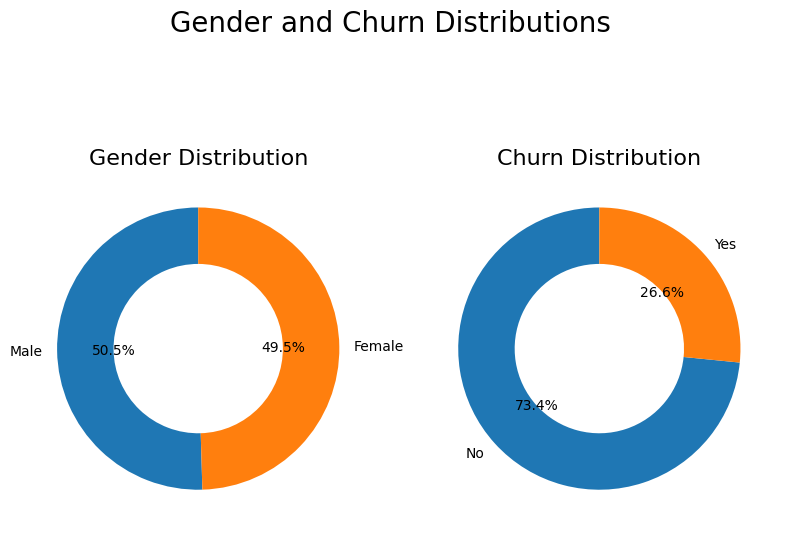

In [8]:
import matplotlib.pyplot as plt
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
gender_counts = df['gender'].value_counts()
churn_counts = df['Churn'].value_counts()
fig, axes = plt.subplots(1, 2, figsize=(8,6))
wedges_gender, texts_gender, autotexts_gender = axes[0].pie(gender_counts, labels=g_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
axes[0].set_title('Gender Distribution', fontsize=16)
wedges_churn, texts_churn, autotexts_churn = axes[1].pie(churn_counts, labels=c_labels, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
axes[1].set_title('Churn Distribution', fontsize=16)
fig.suptitle("Gender and Churn Distributions", fontsize=20, y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [9]:
print(df["Churn"][df["Churn"]==0].groupby(by=df["gender"]).count())
print(df["Churn"][df["Churn"]==1].groupby(by=df["gender"]).count())

gender
Female    2544
Male      2619
Name: Churn, dtype: int64
gender
Female    939
Male      930
Name: Churn, dtype: int64


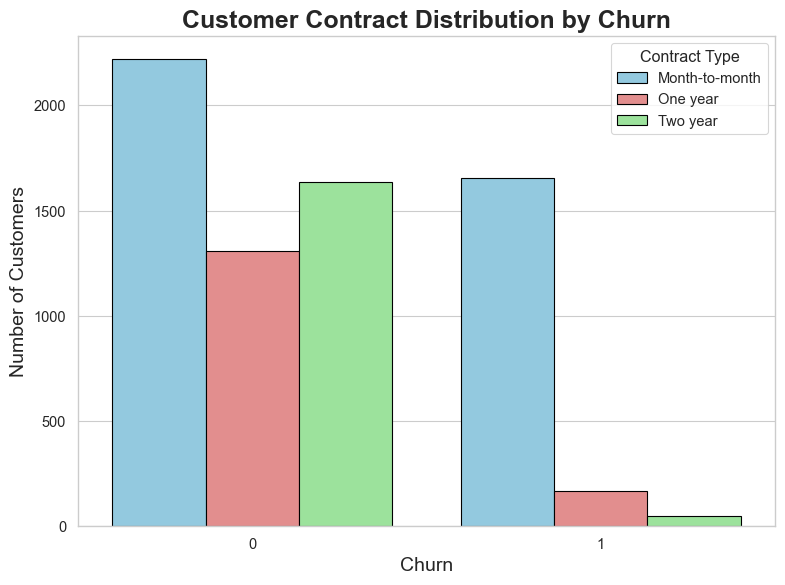

In [10]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
colors = {'Month-to-month': 'skyblue', 'One year': 'lightcoral', 'Two year': 'lightgreen'}
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Churn', hue='Contract', palette=colors, edgecolor='black')
plt.title("Customer Contract Distribution by Churn", fontsize=18, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Contract Type", loc='upper right', frameon=True)
plt.tight_layout()
plt.show()

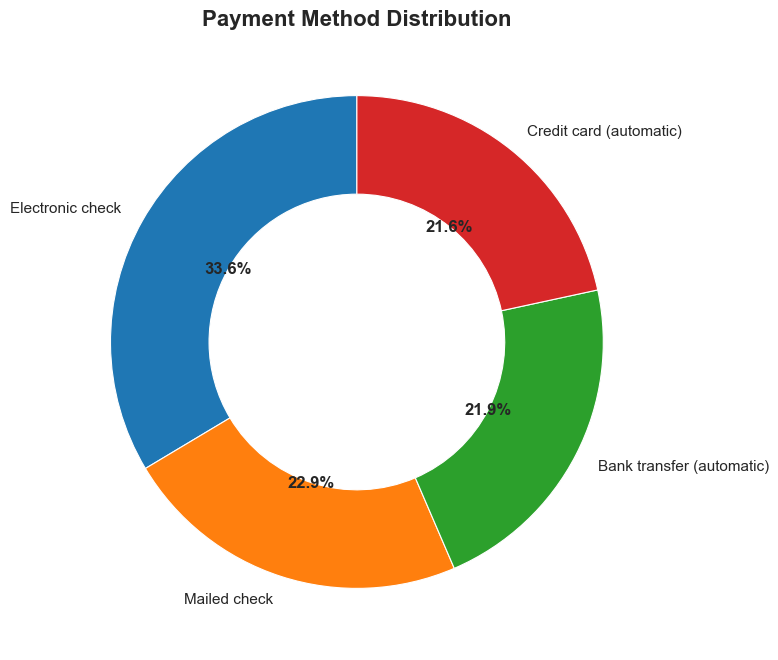

In [11]:
import pandas as pd
import os
import matplotlib.pyplot as plt
csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
project_dir = r'C:\\Users\\Brooz\\my_churn_app'
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, wedgeprops={'width': 0.4})
ax.set_title("Payment Method Distribution", fontsize=16, weight='bold')
ax.set_aspect('equal')
plt.setp(autotexts, size=12, weight="bold")
plt.setp(texts, size=11)
plt.show()

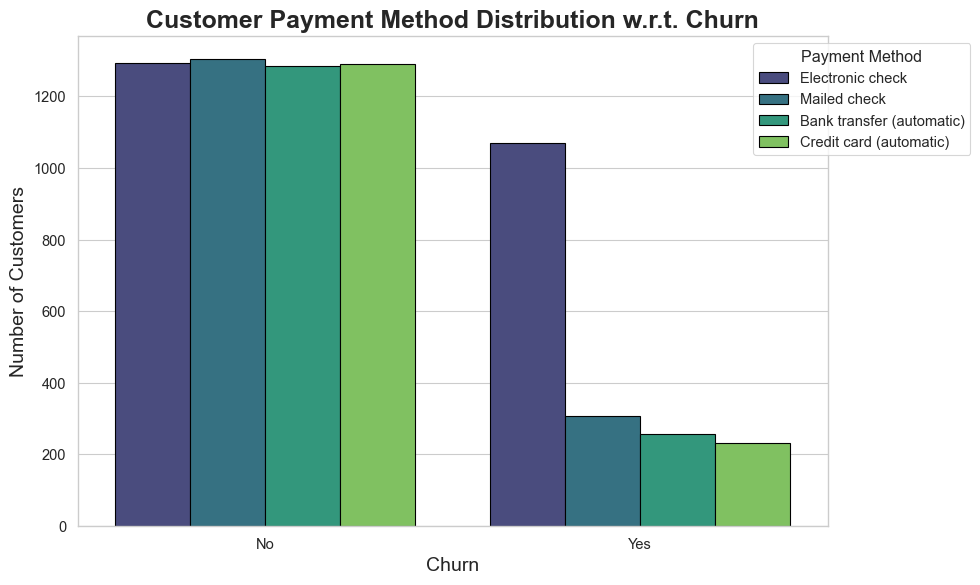

In [12]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
project_dir = r'C:\\Users\\Brooz\\my_churn_app'
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.2)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn', hue='PaymentMethod', palette='viridis', edgecolor='black')
plt.title("Customer Payment Method Distribution w.r.t. Churn", fontsize=18, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Payment Method", loc='upper right', bbox_to_anchor=(1.2, 1), frameon=True)
plt.tight_layout()
plt.show()

In [13]:
print(df["InternetService"].unique())
print(df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts())
# Note: Fixing the syntax error in the original code for Female
print(df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts())

['DSL' 'Fiber optic' 'No']
InternetService  Churn
DSL              No       993
Fiber optic      No       910
No               No       722
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
Name: count, dtype: int64
InternetService  Churn
DSL              No       969
Fiber optic      No       889
No               No       691
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
Name: count, dtype: int64


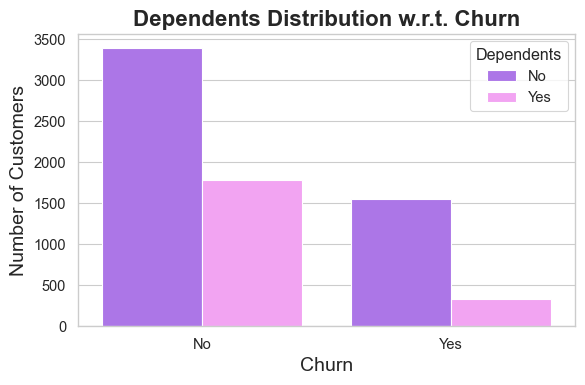

In [14]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
project_dir = r'C:\\Users\\Brooz\\my_churn_app'
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)
color_map_seaborn = {"Yes": "#FF97FF", "No": "#AB63FA"}
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='Dependents', palette=color_map_seaborn)
plt.title("Dependents Distribution w.r.t. Churn", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Dependents", loc='upper right')
plt.tight_layout()
plt.show()

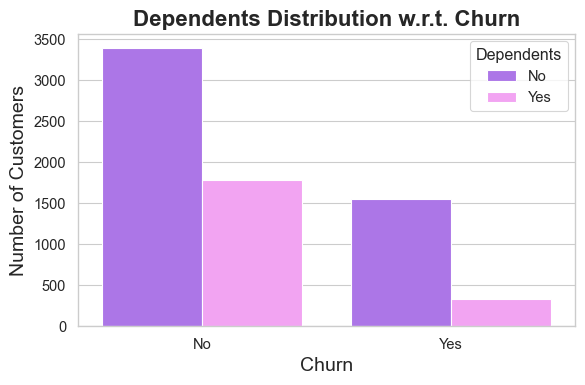

In [15]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
project_dir = r'C:\\Users\\Brooz\\my_churn_app'
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)
color_map_seaborn = {"Yes": "#FF97FF", "No": "#AB63FA"}
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='Dependents', palette=color_map_seaborn)
plt.title("Dependents Distribution w.r.t. Churn", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Dependents", loc='upper right')
plt.tight_layout()
plt.show()

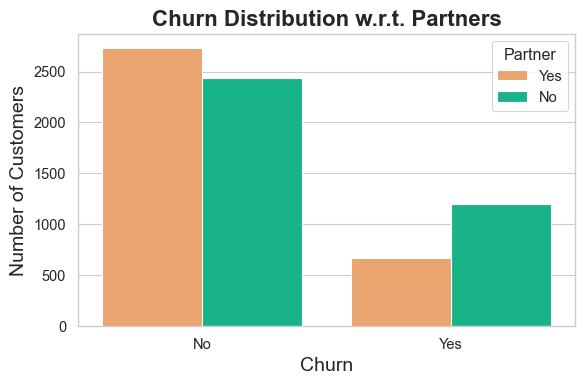

In [16]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
project_dir = r'C:\\Users\\Brooz\\my_churn_app'
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)
color_map_seaborn = {"Yes": '#FFA15A', "No": '#00CC96'}
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='Partner', palette=color_map_seaborn)
plt.title("Churn Distribution w.r.t. Partners", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Partner", loc='upper right')
plt.tight_layout()
plt.show()

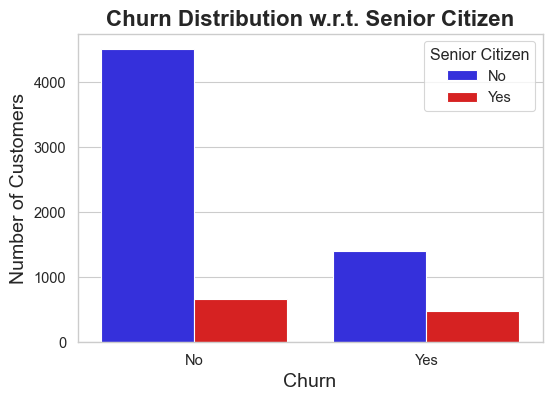

In [17]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
project_dir = r'C:\\Users\\Brooz\\my_churn_app'
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})
color_map_seaborn = {"Yes": "#F40404C4", "No": "#1A13F7"}
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='SeniorCitizen', palette=color_map_seaborn)
plt.title("Churn Distribution w.r.t. Senior Citizen", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Senior Citizen", loc='upper right')
plt.show()

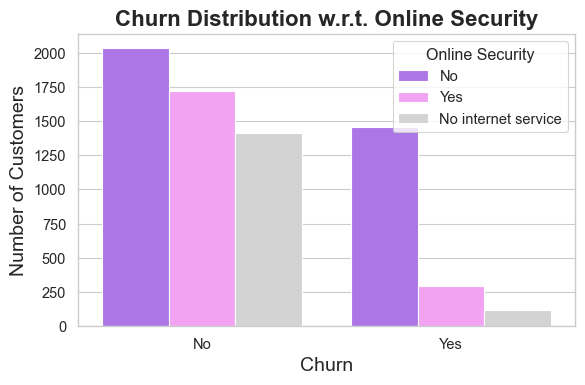

In [18]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
project_dir = r'C:\\Users\\Brooz\\my_churn_app'
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)
color_map_seaborn = {"Yes": "#FF97FF", "No": "#AB63FA", "No internet service": "#D3D3D3"}
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='OnlineSecurity', palette=color_map_seaborn)
plt.title("Churn Distribution w.r.t. Online Security", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Online Security", loc='upper right')
plt.tight_layout()
plt.show()

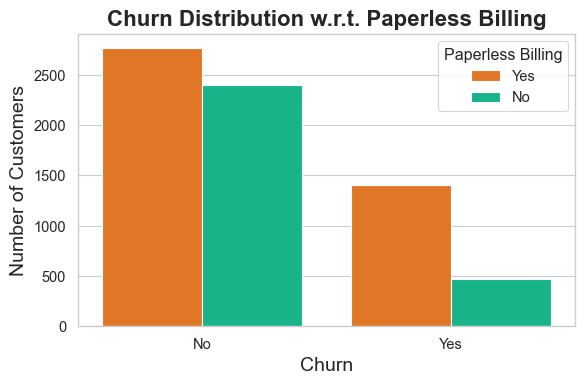

In [19]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
project_dir = r'C:\\Users\\Brooz\\my_churn_app'
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)
color_map_seaborn = {"Yes": "#FF7308", "No": '#00CC96'}
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='PaperlessBilling', palette=color_map_seaborn)
plt.title("Churn Distribution w.r.t. Paperless Billing", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Paperless Billing", loc='upper right')
plt.tight_layout()
plt.show()

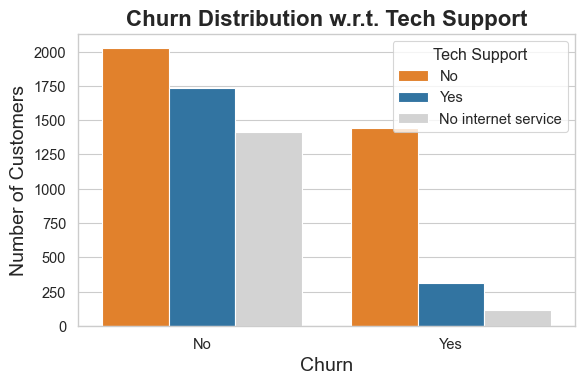

In [20]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
project_dir = r'C:\\Users\\Brooz\\my_churn_app'
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)
color_map_seaborn = {"Yes": '#1f77b4', "No": '#ff7f0e', "No internet service": '#d3d3d3'}
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='TechSupport', palette=color_map_seaborn)
plt.title("Churn Distribution w.r.t. Tech Support", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Tech Support", loc='upper right')
plt.tight_layout()
plt.show()

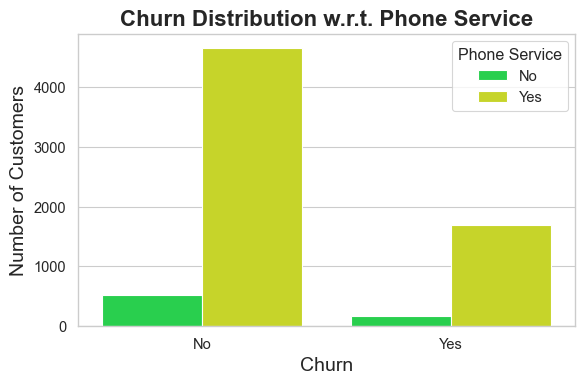

In [21]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
project_dir = r'C:\\Users\\Brooz\\my_churn_app'
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)
color_map_seaborn = {"Yes": "#DEF10D", "No": "#0EEA3E"}
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', hue='PhoneService', palette=color_map_seaborn)
plt.title("Churn Distribution w.r.t. Phone Service", fontsize=16, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Number of Customers", fontsize=14)
plt.legend(title="Phone Service", loc='upper right')
plt.tight_layout()
plt.show()

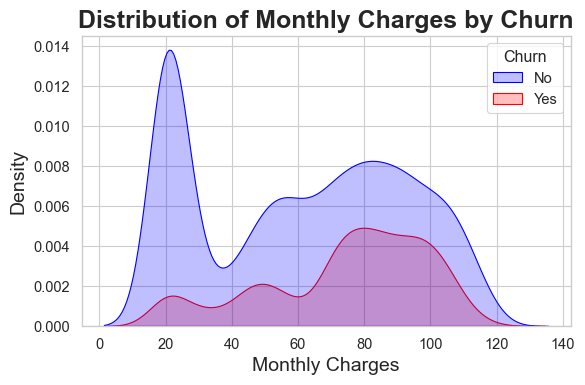

In [22]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
project_dir = r'C:\\Users\\Brooz\\my_churn_app'
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, palette=['blue', 'red'])
plt.title("Distribution of Monthly Charges by Churn", fontsize=18, weight='bold')
plt.xlabel("Monthly Charges", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.tight_layout()
plt.show()

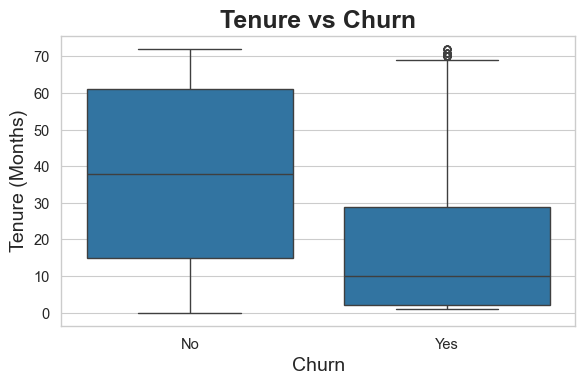

In [23]:

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
csv_file_name = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
project_dir = r'C:\\Users\\Brooz\\my_churn_app'
file_path = os.path.join(project_dir, csv_file_name)
df = pd.read_csv(file_path)
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Tenure vs Churn", fontsize=18, weight='bold')
plt.xlabel("Churn", fontsize=14)
plt.ylabel("Tenure (Months)", fontsize=14)
plt.tight_layout()
plt.show()

In [24]:

from sklearn.preprocessing import LabelEncoder
def object_to_int(dataframe_series):
    if dataframe_series.dtype == 'object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series
df = df.apply(lambda x: object_to_int(x))
print(df.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0        5375       0              0        1           0       1   
1        3962       1              0        0           0      34   
2        2564       1              0        0           0       2   
3        5535       1              0        0           0      45   
4        6511       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   


In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
print(df.corr()['Churn'].sort_values(ascending=False))

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
TotalCharges        0.014479
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64


<Figure size 1400x700 with 0 Axes>

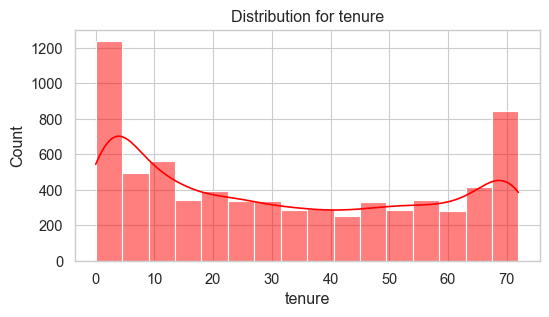

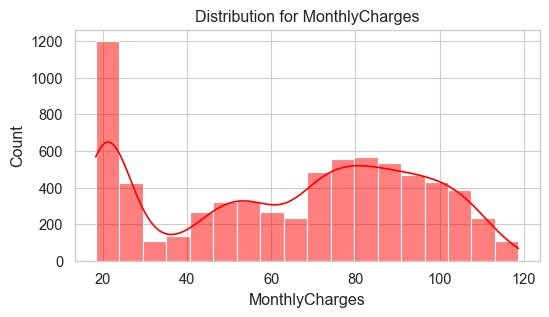

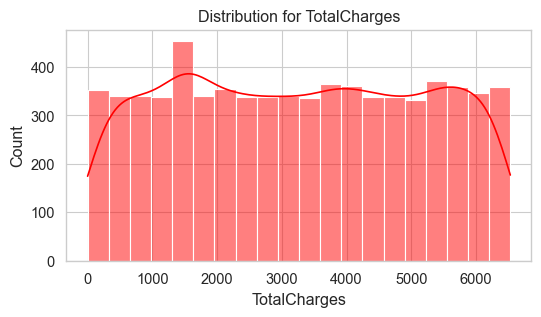

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(6,3))
    plt.title(f"Distribution for {feature}")
    sns.histplot(frame[feature], color=color, kde=True)
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols:
    distplot(feat, df)
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Before SMOTE:", pd.Series(y_train).value_counts().to_dict())
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("After SMOTE:", pd.Series(y_train_res).value_counts().to_dict())

Before SMOTE: {0: 4139, 1: 1495}
After SMOTE: {0: 4139, 1: 4139}


In [28]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Churn'])
y = df['Churn'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40, stratify=y)

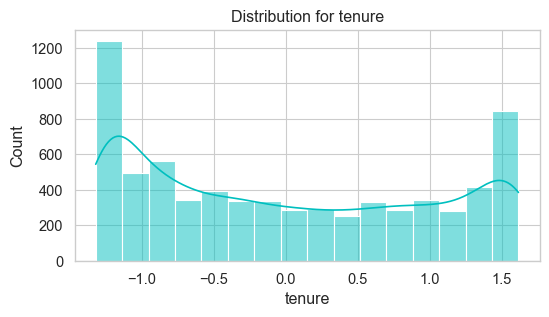

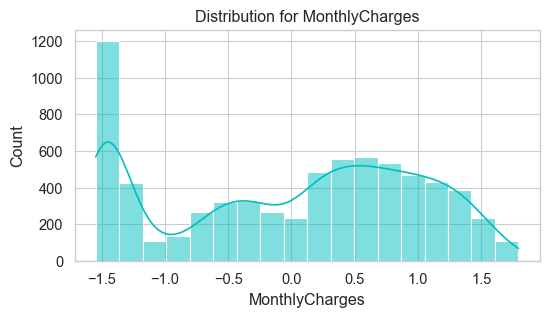

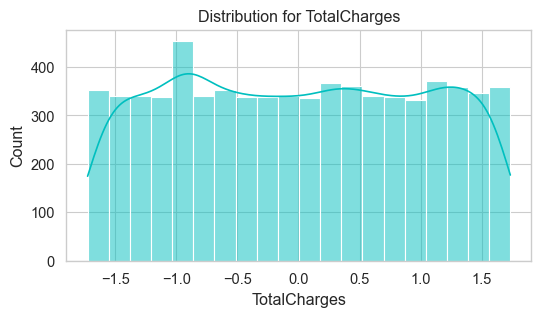

In [29]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')), columns=num_cols)
def distplot(feature, frame, color='c'):
    plt.figure(figsize=(6,3))
    plt.title(f"Distribution for {feature}")
    sns.histplot(frame[feature], color=color, kde=True)
for feat in num_cols:
    distplot(feat, df_std)
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test, y_test)
print("KNN accuracy:", accuracy_knn)
print(classification_report(y_test, predicted_y))

KNN accuracy: 0.7169900615238997
              precision    recall  f1-score   support

           0       0.74      0.95      0.83      1552
           1       0.34      0.07      0.12       561

    accuracy                           0.72      2113
   macro avg       0.54      0.51      0.47      2113
weighted avg       0.63      0.72      0.64      2113



In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(class_weight='balanced', solver='liblinear', max_iter=1000)
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print("Logistic Regression (balanced):")
print(classification_report(y_test, pred_lr))

Logistic Regression (balanced):
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1552
           1       0.49      0.81      0.61       561

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.73      0.74      2113



In [33]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
svc_model = SVC(random_state=1)
svc_model.fit(X_train, y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test, y_test)
print("SVM accuracy is:", accuracy_svc)
print(classification_report(y_test, predict_y))

SVM accuracy is: 0.73450070989115
              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1552
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.54      0.73      0.62      2113



Random Forest accuracy: 0.8002839564600095
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1552
           1       0.67      0.49      0.56       561

    accuracy                           0.80      2113
   macro avg       0.75      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



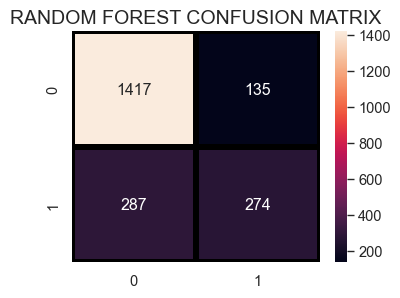

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1, random_state=50, max_features='sqrt', max_leaf_nodes=30)
model_rf.fit(X_train, y_train)
prediction_test = model_rf.predict(X_test)
print("Random Forest accuracy:", metrics.accuracy_score(y_test, prediction_test))
print(classification_report(y_test, prediction_test))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, prediction_test), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("RANDOM FOREST CONFUSION MATRIX", fontsize=14)
plt.show()

In [35]:
from sklearn.metrics import classification_report
probs = lr.predict_proba(X_test)[:,1]
for thr in [0.5, 0.4, 0.3, 0.25]:
    preds = (probs >= thr).astype(int)
    print("Threshold:", thr)
    print(classification_report(y_test, preds))

Threshold: 0.5
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1552
           1       0.49      0.81      0.61       561

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.73      0.74      2113

Threshold: 0.4
              precision    recall  f1-score   support

           0       0.93      0.62      0.75      1552
           1       0.45      0.87      0.60       561

    accuracy                           0.69      2113
   macro avg       0.69      0.75      0.67      2113
weighted avg       0.80      0.69      0.71      2113

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.96      0.53      0.68      1552
           1       0.42      0.93      0.58       561

    accuracy                           0.64      2113
   macro avg       0.69      0.73      0.63      2113
weighted avg       0.81      

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("Random Forest (balanced):")
print(classification_report(y_test, pred_rf))

Random Forest (balanced):
              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1552
           1       0.64      0.52      0.57       561

    accuracy                           0.79      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.78      0.79      0.79      2113



In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='drop'
)
pipe = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000))
])
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("Logistic (pipeline) — classification report:")
print(classification_report(y_test, pred))

Logistic (pipeline) — classification report:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1552
           1       0.49      0.80      0.61       561

    accuracy                           0.73      2113
   macro avg       0.70      0.75      0.70      2113
weighted avg       0.80      0.73      0.74      2113



In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
pipe_knn = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', KNeighborsClassifier())
])
param_grid_knn = {
    'clf__n_neighbors': [3, 5, 7, 11],
    'clf__weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, scoring='f1', cv=5, n_jobs=-1)
grid_knn.fit(X_train, y_train)
print("Best KNN params:", grid_knn.best_params_)
print(classification_report(y_test, grid_knn.predict(X_test)))

Best KNN params: {'clf__n_neighbors': 11, 'clf__weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.90      0.63      0.74      1552
           1       0.44      0.80      0.57       561

    accuracy                           0.68      2113
   macro avg       0.67      0.72      0.65      2113
weighted avg       0.78      0.68      0.69      2113



In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
svc_params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced']
}
svc_grid = GridSearchCV(SVC(probability=True, random_state=42), param_grid=svc_params, scoring='f1', cv=5, n_jobs=-1)
svc_grid.fit(X_train_res, y_train_res)
best_svc = svc_grid.best_estimator_
pred_svc = best_svc.predict(X_test)
print("SVC accuracy:", accuracy_score(y_test, pred_svc))
print(classification_report(y_test, pred_svc))

KeyboardInterrupt: 

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
rf_model = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1, random_state=50, max_features='sqrt', max_leaf_nodes=30)
rf_model.fit(X_train_res, y_train_res)
pred_rf = rf_model.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Random Forest accuracy: 0.7468054898248935
              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1552
           1       0.52      0.71      0.60       561

    accuracy                           0.75      2113
   macro avg       0.70      0.73      0.71      2113
weighted avg       0.78      0.75      0.76      2113



In [41]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
pipe_rf = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1, random_state=50, max_features='sqrt', max_leaf_nodes=30, class_weight='balanced'))
])
pipe_rf.fit(X_train, y_train)
pred_rf = pipe_rf.predict(X_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1552
           1       0.52      0.76      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.80      0.75      0.76      2113



In [42]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
pipe_rf = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1, random_state=50, max_features='sqrt', max_leaf_nodes=30, class_weight='balanced'))
])
pipe_rf.fit(X_train, y_train)
pred_rf = pipe_rf.predict(X_test)
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1552
           1       0.52      0.76      0.62       561

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.72      2113
weighted avg       0.80      0.75      0.76      2113



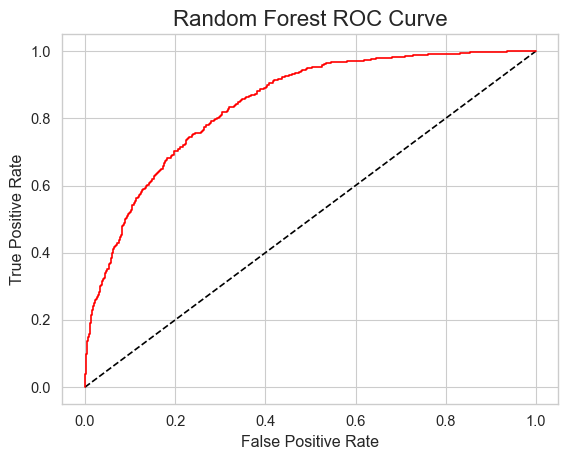

In [44]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='Random Forest', color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve', fontsize=16)
plt.show()

Logistic Regression accuracy is: 0.7927117841930904
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1552
           1       0.62      0.57      0.60       561

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.73      2113
weighted avg       0.79      0.79      0.79      2113



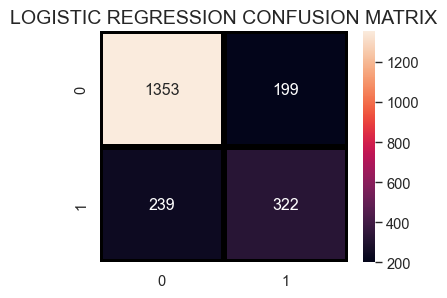

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
accuracy_lr = lr_model.score(X_test, y_test)
print("Logistic Regression accuracy is:", accuracy_lr)
lr_pred = lr_model.predict(X_test)
report = classification_report(y_test, lr_pred)
print(report)
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX", fontsize=14)
plt.show()

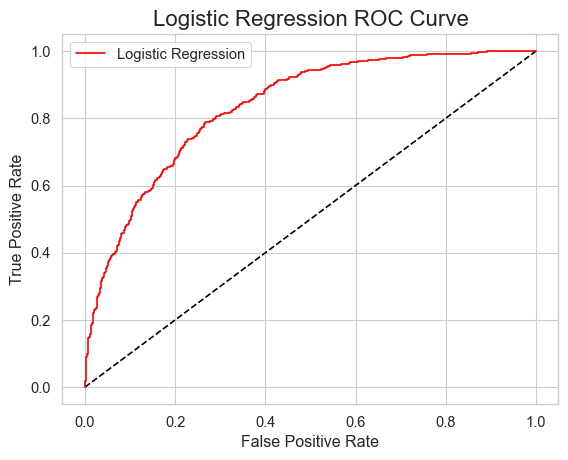

In [46]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression', color="r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve', fontsize=16)
plt.legend()
plt.show()

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test, y_test)
print("Decision Tree accuracy is:", accuracy_dt)
print(classification_report(y_test, predictdt_y))

Decision Tree accuracy is: 0.7311878845243729
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1552
           1       0.49      0.52      0.51       561

    accuracy                           0.73      2113
   macro avg       0.66      0.67      0.66      2113
weighted avg       0.74      0.73      0.73      2113



AdaBoost Classifier accuracy: 0.7969711310932324
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1552
           1       0.63      0.57      0.60       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



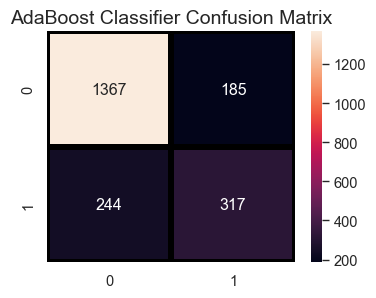

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
a_model = AdaBoostClassifier()
a_model.fit(X_train, y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy:", accuracy_score(y_test, a_preds))
print(classification_report(y_test, a_preds))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("AdaBoost Classifier Confusion Matrix", fontsize=14)
plt.show()

In [49]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
pipe_ada = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', AdaBoostClassifier(random_state=42))
])
pipe_ada.fit(X_train, y_train)
pred_a = pipe_ada.predict(X_test)
print("AdaBoost (pipeline) classification report:")
print(classification_report(y_test, pred_a))

AdaBoost (pipeline) classification report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1552
           1       0.51      0.76      0.61       561

    accuracy                           0.74      2113
   macro avg       0.70      0.75      0.71      2113
weighted avg       0.79      0.74      0.75      2113



Gradient Boosting Classifier accuracy: 0.7969711310932324
              precision    recall  f1-score   support

           0       0.85      0.89      0.86      1552
           1       0.64      0.55      0.59       561

    accuracy                           0.80      2113
   macro avg       0.74      0.72      0.73      2113
weighted avg       0.79      0.80      0.79      2113



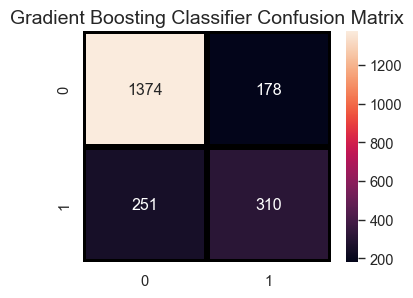

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier accuracy:", accuracy_score(y_test, gb_pred))
print(classification_report(y_test, gb_pred))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, gb_pred), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("Gradient Boosting Classifier Confusion Matrix", fontsize=14)
plt.show()

In [51]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
pipe_gb = ImbPipeline([
    ('preproc', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('clf', GradientBoostingClassifier(random_state=42))
])
pipe_gb.fit(X_train, y_train)
pred_gb = pipe_gb.predict(X_test)
print("Gradient Boosting (pipeline) classification report:")
print(classification_report(y_test, pred_gb))

Gradient Boosting (pipeline) classification report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1552
           1       0.56      0.72      0.63       561

    accuracy                           0.77      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.77      0.78      2113



Voting Classifier Accuracy Score:
0.8035967818267865
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1552
           1       0.65      0.58      0.61       561

    accuracy                           0.80      2113
   macro avg       0.75      0.73      0.74      2113
weighted avg       0.80      0.80      0.80      2113



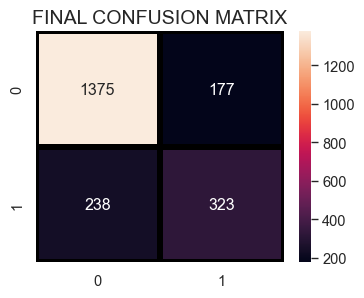

In [52]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Voting Classifier Accuracy Score:")
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", linecolor="k", linewidths=3)
plt.title("FINAL CONFUSION MATRIX", fontsize=14)
plt.show()

In [53]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
clf1 = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=3)
clf2 = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=500)
clf3 = AdaBoostClassifier(random_state=42, n_estimators=50)
voting_clf = VotingClassifier(estimators=[('gb', clf1), ('lr', clf2), ('ab', clf3)], voting='soft')
voting_clf.fit(X_train, y_train)
pred_vote = voting_clf.predict(X_test)
print("Voting Classifier Results:")
print("Accuracy:", accuracy_score(y_test, pred_vote))
print(classification_report(y_test, pred_vote))

Voting Classifier Results:
Accuracy: 0.7728348319924279
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1552
           1       0.56      0.68      0.61       561

    accuracy                           0.77      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.79      0.77      0.78      2113



In [54]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
clf1 = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=3)
clf2 = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=500)
clf3 = AdaBoostClassifier(random_state=42, n_estimators=50)
voting_clf = VotingClassifier(estimators=[('gb', clf1), ('lr', clf2), ('ab', clf3)], voting='soft')
voting_clf.fit(X_train, y_train)
pred_vote = voting_clf.predict(X_test)
print("Voting Classifier Results:")
print("Accuracy:", accuracy_score(y_test, pred_vote))
print(classification_report(y_test, pred_vote))

Voting Classifier Results:
Accuracy: 0.7728348319924279
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1552
           1       0.56      0.68      0.61       561

    accuracy                           0.77      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.79      0.77      0.78      2113



In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
clf1 = GradientBoostingClassifier()
clf2 = LogisticRegression()
clf3 = AdaBoostClassifier()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2), ('abc', clf3)], voting='soft')
param_grid = {
    'gbc__n_estimators': [100, 200],
    'gbc__max_depth': [3, 5],
    'lr__C': [0.1, 1.0, 10.0],
    'abc__n_estimators': [50, 100]
}
grid_search = GridSearchCV(estimator=eclf1, param_grid=param_grid, cv=5, scoring='recall_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found:", grid_search.best_params_)
print("Best Weighted Recall Score:", grid_search.best_score_)
best_voting_model = grid_search.best_estimator_

Best parameters found: {'abc__n_estimators': 100, 'gbc__max_depth': 5, 'gbc__n_estimators': 100, 'lr__C': 0.1}
Best Weighted Recall Score: 0.8068965517241381


In [56]:
import joblib
import os
output_path = os.path.join('C:\\Users\\Brooz\\my_churn_app', 'voting_classifier_final_model.pkl')
joblib.dump(best_voting_model, output_path)
print("Model saved successfully.")
print(f"File saved at: {output_path}")

Model saved successfully.
File saved at: C:\Users\Brooz\my_churn_app\voting_classifier_final_model.pkl
